<img src="anu-logo.png" height="30">

<h1 align='center'> COMP2420/COMP6420 - Introduction to Data Management, <br/>Analysis and Security</h1>

<h2 align='center'>Mid-Semester Exam - Sample Questions</h2>

*****


In [111]:
# IMPORTING FREQUENTLY USED PYTHON MODULES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
plt.style.use('seaborn-notebook')
%matplotlib inline

# JUST TO MAKE SURE SOME WARNINGS ARE IGNORED 
import warnings
warnings.filterwarnings("ignore")

# IMPORT ANY PACKAGES YOU WOULD LIKE TO USE BELOW
from sklearn.preprocessing import LabelEncoder
import timeit
from scipy import stats
from pandas.plotting import scatter_matrix
from pylab import rcParams
from sklearn.preprocessing import StandardScaler
from matplotlib import cm          # colour maps
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Section A - Data Analysis

### Question 1: _[30 marks]_ 

You are given the following dataset from the **Seaborn** library in Anaconda.

1) **Do some exploratory data analysis on this dataset and find out _three_ facts that jump out from this data.**
<span style= 'float: right;'><b>[5 marks]</b></span>

In [2]:
df_diamonds = sns.load_dataset('diamonds')

# DO SOME EXPLORATORY DATA ANALYSIS ON THE DATASET
# AND STATE 3 FACTS THE JUMP OUT FROM THE BASIC STAT 
# ANALYSIS OF THE DATASET.

# Checking for wrong entries like symbols -,?,#,*,etc.
for col in df_diamonds.columns:
    print('{} : {}'.format(col,df_diamonds[col].unique()))
    
# Checking for missing values    
print(df_diamonds.isnull().sum())

carat : [0.23 0.21 0.29 0.31 0.24 0.26 0.22 0.3  0.2  0.32 0.33 0.25 0.35 0.42
 0.28 0.38 0.7  0.86 0.71 0.78 0.96 0.73 0.8  0.75 0.74 0.81 0.59 0.9
 0.91 0.61 0.77 0.63 0.76 0.64 0.72 0.79 0.58 1.17 0.6  0.83 0.54 0.98
 0.52 1.01 0.53 0.84 0.51 1.05 0.55 0.87 1.   0.57 0.82 1.04 0.93 1.2
 0.99 0.34 0.43 0.36 0.95 0.89 1.02 0.97 0.56 0.85 0.92 1.27 0.66 1.12
 0.68 1.03 0.62 1.22 1.08 0.88 0.5  1.19 0.39 0.65 1.24 1.5  0.27 0.41
 1.13 1.06 0.69 0.4  1.14 0.94 1.29 1.52 1.16 1.21 1.23 1.09 0.67 1.11
 1.1  1.18 1.15 1.25 1.07 1.28 1.51 0.37 1.31 1.26 1.39 1.44 1.35 1.3
 1.32 1.41 1.36 1.45 1.34 1.58 1.54 1.38 1.33 1.74 1.64 1.47 1.4  1.55
 1.95 2.   1.37 1.83 1.62 1.57 1.69 2.06 1.72 1.66 2.14 1.49 1.46 2.15
 1.96 2.22 1.7  1.53 1.85 2.01 2.27 1.68 1.56 1.81 1.65 1.82 2.03 1.73
 1.59 1.42 1.43 2.08 1.48 1.6  2.49 1.71 2.02 2.07 3.   2.21 2.1  1.91
 2.25 2.17 2.32 2.72 1.61 2.23 2.11 2.05 1.63 2.3  2.31 1.75 2.04 2.12
 1.77 2.5  1.8  1.67 1.84 2.2  3.01 1.88 2.33 2.68 2.34 1.9  2.16 2.74
 

In [3]:
df_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df_diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
# Encode categorical variables
# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
df_diamonds['cut_num'] = labelencoder.fit_transform(df_diamonds['cut'])
df_diamonds['color_num'] = labelencoder.fit_transform(df_diamonds['color'])
df_diamonds['clarity_num'] = labelencoder.fit_transform(df_diamonds['clarity'])
df_diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num,color_num,clarity_num
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2,1,3
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3,1,2
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1,1,4
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,5,5
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,2,0,2
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,1,0,2
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,4,0,2
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,3,4,3


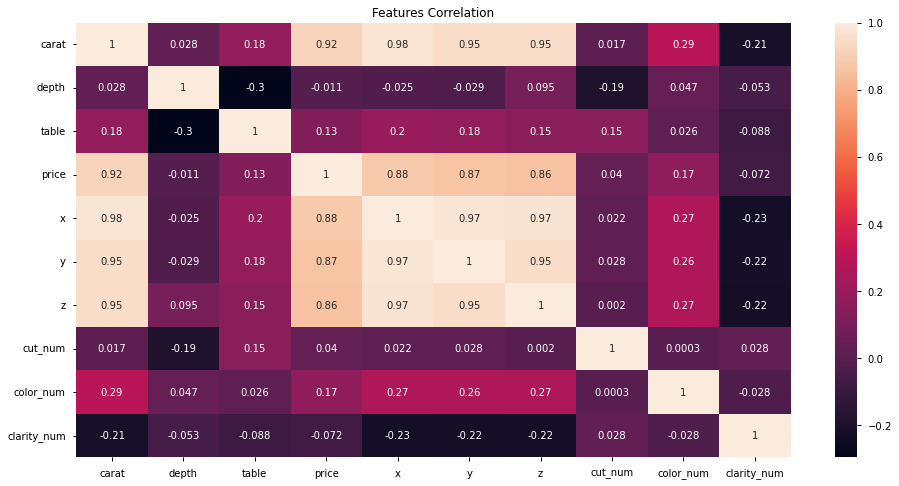

The price is strongly correlated to the carat, and the unknown variables. There are 3 unknown variables in the dataset labelled x,y,z.


In [6]:
# Plot correlation heatmap
def plot_correlation_heatmap(data):
    '''
    plot correlation's matrix to explore dependency between features 
    '''
    # Looking for correlations in the data set
    corr_matrix = data.corr()
    # Generating a heatmap of the correlation matrix
    plt.figure(figsize=(16, 8))
    heatmap = sns.heatmap(data.corr(), annot=True);
    heatmap.set_title('Features Correlation')
    plt.show()  
plot_correlation_heatmap(df_diamonds)

print("The price is strongly correlated to the carat, and the unknown variables. There are 3 unknown variables in the dataset labelled x,y,z.")

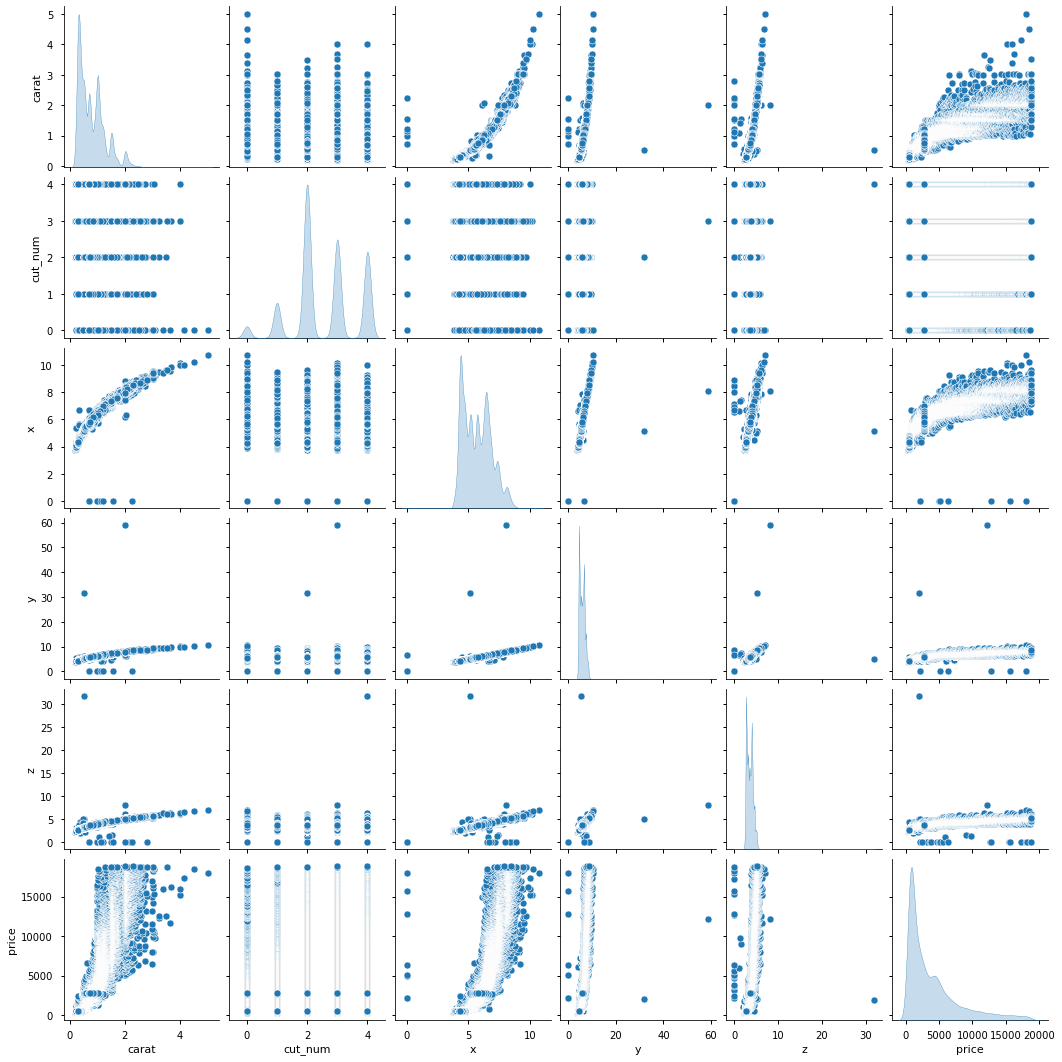

In [7]:
%%time
# Plot scatter matrix
def plot_scatter_matrix(data):
    # plotting a scatter matrix of a few promising attributes
    attributes = ["carat", "cut_num", "x", "y", "z", "price"]
    rcParams['figure.figsize'] = 28, 6
    sns.pairplot(data[attributes], diag_kind='kde')
plot_scatter_matrix(df_diamonds)

Wall time: 4.26 s


<AxesSubplot:xlabel='price', ylabel='cut_num'>

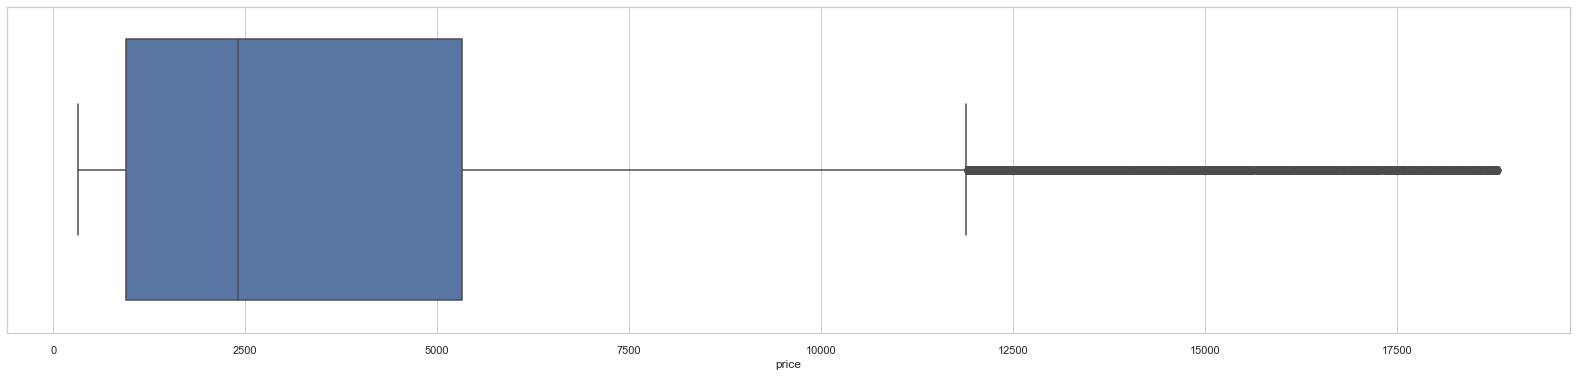

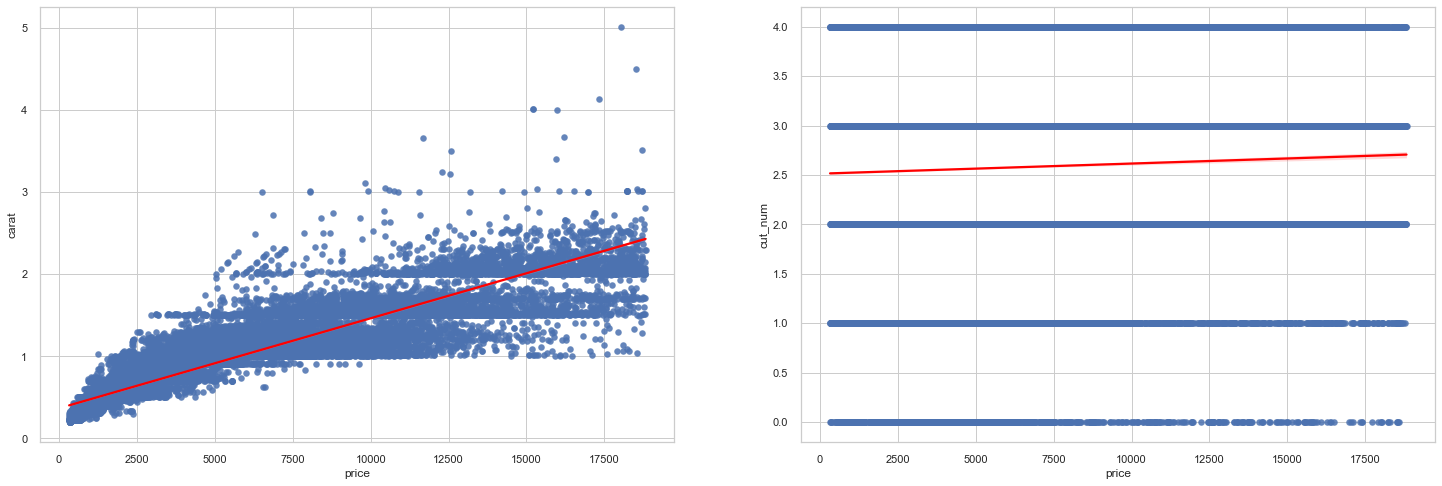

In [8]:
%%time
# Detect outliers using box plots and scatter plots and Z-score
# Box plot
sns.set_theme(style="whitegrid")
sns.boxplot(x=df_diamonds['price'])

# scatter plots
fig = plt.figure(figsize=(25, 8))
ax1 = fig.add_subplot(121)
plt.scatter(df_diamonds['price'], df_diamonds['carat'], alpha=0.3)
sns.regplot(x=df_diamonds['price'], y=df_diamonds['carat'], line_kws={"color": "red"})

ax2 = fig.add_subplot(122)
plt.scatter(df_diamonds['price'], df_diamonds['cut_num'], alpha=0.3)
sns.regplot(x=df_diamonds['price'], y=df_diamonds['cut_num'], line_kws={"color": "red"})


2) **Find out the max weight (in carat) and most valueable stone(s).**
<span style= 'float: right;'><b>[2 marks]</b></span>

In [7]:
# YOUR CODE HERE
# Find the highest carat and price
carat_col = df_diamonds["carat"]
max_carat = carat_col.max()
print(f'The max weight (in carat) is {max_carat}')

price_col = df_diamonds["price"]
max_price = price_col.max()
print(f'The most valuable stone(s) is/are ${max_price}')

The max weight (in carat) is 5.01
The most valuable stone(s) is/are $18823


3) **Are stones of max weight also the dearest stones? Justify your answer with appropriate data or visualisation.**

<span style= 'float: right;'><b>[3 marks]</b></span>

In [8]:
# YOUR CODE HERE
# df.loc[df['col1'] == value]
tmp_df = df_diamonds.copy()
tmp_df = tmp_df.loc[tmp_df['carat'] == max_carat]
print('From the table below it can be seen that the max weight stone has clarity of I1 (included) which is not the clearest. The clearest would be FL or IF')
tmp_df

From the table below it can be seen that the max weight stone has clarity of I1 (included) which is not the clearest. The clearest would be FL or IF


,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num,color_num,clarity_num
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98,0,6,0


3) **Find out how the average price per carat for different cut (quality) groups. Do cut quality group names correlate with the average price? Plot the results (using bar plot or piechart).**

<span style= 'float: right;'><b>[20 marks]</b></span>

The average prices are {'Fair': 4584.2577042999055, 'Good': 4358.757763975155, 'Premium': 3928.864451691806, 'Very Good': 3981.7598907465654, 'Ideal': 3457.541970210199}
The average prices are {'Fair': 4584.2577042999055, 'Good': 4358.757763975155, 'Premium': 3928.864451691806, 'Very Good': 3981.7598907465654, 'Ideal': 3457.541970210199}


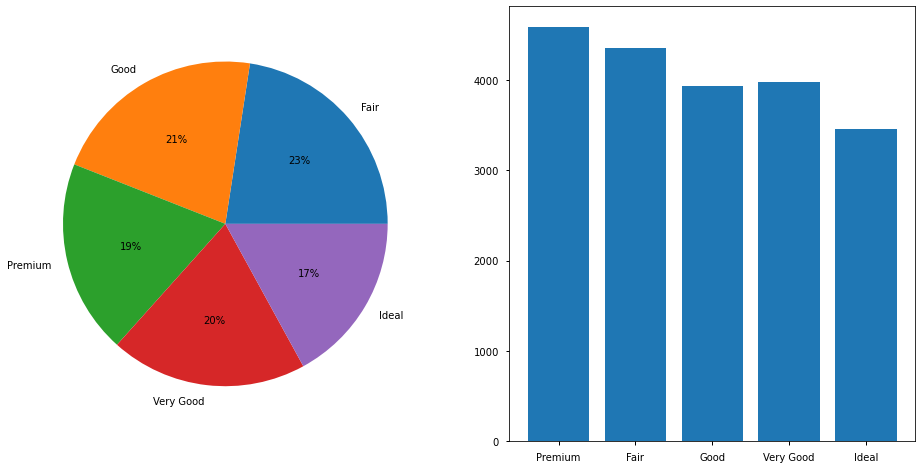

There's a very slight correlation of cut quality with price. Better cuts are more expensive


In [22]:
# YOUR CODE HERE
# get all the prices for a cut category and average them. Plot the results

# get the average price of each df
def avg_price_of_cuts():
    '''
    This function returns the avg price of all the different cut types
    '''
    tmp_df = df_diamonds.copy()
    labels = list(set(df_diamonds['cut']))

    Premium_df = tmp_df.loc[tmp_df['cut'] == 'Premium']
    Fair_df = tmp_df.loc[tmp_df['cut'] == 'Fair']
    Good_df = tmp_df.loc[tmp_df['cut'] == 'Good']
    Very_Good_df = tmp_df.loc[tmp_df['cut'] == 'Very Good']
    Ideal_df = tmp_df.loc[tmp_df['cut'] == 'Ideal']

    premium_avg_price = Premium_df['price'].mean()
    fair_avg_price = Fair_df['price'].mean()
    good_avg_price = Good_df['price'].mean()
    verygood_avg_price = Very_Good_df['price'].mean()
    ideal_avg_price = Ideal_df['price'].mean()
    
    data = [premium_avg_price, fair_avg_price, good_avg_price, verygood_avg_price, ideal_avg_price]
    avg_price_dict = {x:y for x, y in zip(labels, data)}
    
    print(f'The average prices are {avg_price_dict}')
    return data

# plot piechart
def plot_chart(data):
    '''
    This function plots a piechart of the average prices of different cut types
    '''
    labels = list(set(df_diamonds['cut']))  
        
    df = pd.DataFrame({'cut':['Premium', 'Fair', 'Good', 'Very Good', 'Ideal'], 'avg_price':avg_price_of_cuts()})
    
    fig = plt.figure(figsize=(16, 8))
    ax1 = fig.add_subplot(121)
    plt.pie(data, labels=labels, autopct='%.0f%%')

    ax2 = fig.add_subplot(122)
    plt.bar(x='cut', height='avg_price', data=df)

    plt.show()

plot_chart(avg_price_of_cuts())

print("There's a very slight correlation of cut quality with price. Better cuts are more expensive")

### Question 2:  _[15 marks]_ 

Researcher A claims to have quantified the drink consumption habits of **Coffee Grounds'** customers. He claims
that the choice of each customer is a random sample from a distribution over five outcomes: `Smoothie`, `Coffee`,
`Milk Tea`, `Classic Tea`, and `Sparkling Juice`, with probability of 0.2, 0.15, 0.2, 0.4, and 0.05, respectively.


1. **Another researcher B rejects one part of the A's claim: he can’t believe customers choose Classic Tea with a 40% probability (he doesn’t care at all about the probabilities of the other choices). State null and alternative hypotheses that he should use to investigate this issue.**
<span style= 'float: right;'><b>[5 marks]</b></span>

<span style="color:blue">
 
#### YOUR ANSWER HERE

</span>

In [ ]:
# Null hypothesis: Customers choose classic tea with a 40% probability
# Alternate hypothesis: Customers don't choose classic tea with a 40% probability

# researcher B should use the 1 sample test (stats.ttest_1samp) which performs a test aaginst a baseline (in this case 40%)
# Taking a random sample of customers and creating a data of which beverages each customer drinks and tallying the total number of each beverages. they can then find the probablity of classic tea from the data
# and test it against the null hypothesis.


2. **Now B needs a sample of customer choices. Each beverage cup contains a mark describing its original contents. Should he look in the garbage can outside of Coffee Grounds at the end of the day and count the proportion of cups that contained Classic Tea? Why or why not?**
<span style= 'float: right;'><b>[5 marks]</b></span>

<span style="color:blue">
 
#### YOUR ANSWER HERE

</span>

3. **Alternatively, Coffee Grounds offers to give B a uniform random sample of 10 orders from its database of all past orders. He replies, "That’s not enough, I need a large random sample." They ask why. How should he respond to justify his request of a large random sample?**
<span style= 'float: right;'><b>[5 marks]</b></span>

<span style="color:blue">
 
#### YOUR ANSWER HERE

</span>

## Section B - Data Visualization 

### Question 3: _[40 marks]_

1. **In the world of Pokémon, there are many different pokémon, each holding a unique power inside. Ash, the pokémon trainer has collected a large dataset of Pokémon throughout his many adventures, and wants to know more about the composition of different generations of pokémon. Complete the function `plot_pokemon_composition()` to help Ash visualise the composition.**
<span style= 'float: right;'><b>[10 marks]</b></span>

In [196]:
# TODO: COMPLETE THE BELOW FUNCTION
def plot_pokemon_composition(df_pokemon):
    '''
    This function gives a visual representation of the distribution of pokemon's main typings in each generation
    and the total number will represent the total number of pokemons in each generation
    '''
    df_pokemon_copy = df_pokemon.copy()
    df_pokemon_copy.drop(axis=1, labels=['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'], inplace=True)
    
    labels = df_pokemon_copy['Type 1'].unique().tolist()
    generations = [1,2,3,4,5,6]
        
    data = {'Gen1':[0], 'Gen2':[0], 'Gen3':[0], 'Gen4':[0], 'Gen5':[0], 'Gen6':[0]}
    res_df = pd.DataFrame(data, index=labels)
    
    for gen in generations:
        for label in labels:
            types = df_pokemon_copy.apply(lambda x : True if x['Type 1'] == label and x['Generation'] == gen else False, axis = 1)
            gen_num = len(types[types == True].index)
    
            res_df.loc[label, 'Gen'+str(gen)] = gen_num
    print(res_df)


    Gens = ['Gen1', 'Gen2', 'Gen3', 'Gen4', 'Gen5', 'Gen6']
    
    # figure and axis
    fig, ax = plt.subplots(figsize=(12, 10))
    colors = cm.plasma(np.arange(6)/6.)
    # plot bars     
    left = len(res_df) * [0]
    for idx, gen in enumerate(Gens):
        plt.barh(res_df.index, res_df[gen], left=left)
        left = left + res_df[gen]
        
    # title, legend
    plt.title('Composition of pokemon types in each generation')
    ax.legend(Gens, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)

    plt.show()

          Gen1  Gen2  Gen3  Gen4  Gen5  Gen6
Grass       13     9    13    15    15     5
Fire        14     8     8     5     9     8
Water       31    18    27    13    18     5
Bug         14    12    12    10    18     3
Normal      24    15    18    18    19     4
Poison      14     1     3     6     2     2
Electric     9     7     5    12     8     3
Ground       8     3     7     4    10     0
Fairy        2     5     0     1     0     9
Fighting     7     2     5     3     7     3
Psychic     11     7    12     8    14     5
Rock        10     5     8     6     6     9
Ghost        4     1     5     7     5    10
Ice          2     4     7     3     6     2
Dragon       3     0    12     4     9     4
Dark         0     6     6     3    13     3
Steel        0     3    12     3     4     5
Flying       0     0     0     0     2     2


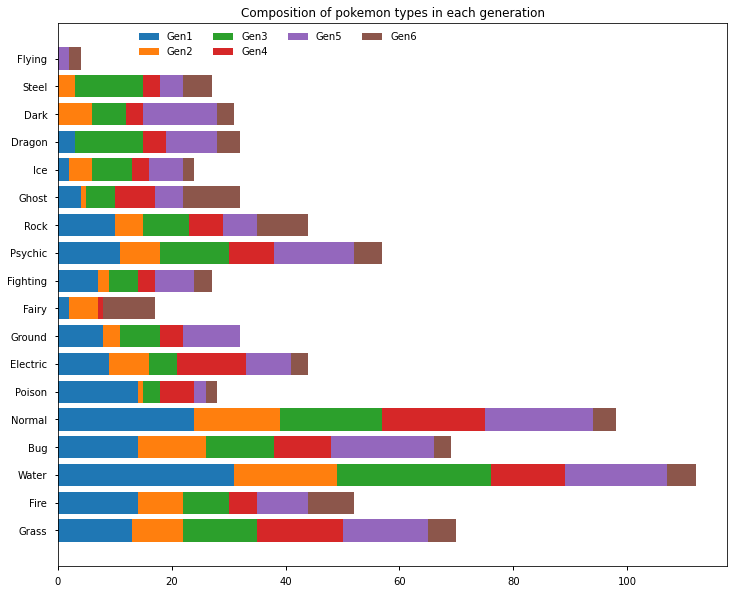

Wall time: 942 ms


In [197]:
%%time
# RUN THIS BLOCK TO TEST YOUR CODE
df_pokemon = pd.read_csv('pokemon.csv')
plot_pokemon_composition(df_pokemon)

2. **Briefly justify why the graph you chose in 1 is suitable for the intended purpose.**

<span style= 'float: right;'><b>[5 marks]</b></span>

<span style="color:blue">
 
#### YOUR ANSWER HERE

</span>

2. **Professor Oak, a specialist in the study of Pokémon, wants to discover the relationship between Attack vs Defense to HP of Pokémon. He asks you to create a graph depicting this relationship, with an additional requirement. Make the data points for Legendary Pokémon (extremely powerful, one-of-a-kind Pokémon) stand out from the others. Complete the function `plot_attack_defense_hp()` to create this graph.**
<span style= 'float: right;'><b>[15 marks]</b></span>

In [2]:
# TODO: COMPLETE THE BELOW FUNCTION
def plot_attack_defense(df_pokemon):
    fig, ax = plt.subplots(1,1, figsize = (25,8))
    colors = cm.plasma(np.arange(6)/6.)\
    
    #extract the labels
    label = df_pokemon["HP"].sample(n=100, random_state=42)
    #use this to create x ticks to add the data to
    x = np.arange(len(label))
    
    #set a width for each bar 
    width = 0.3
    
    # Create first bar
    #set it so that x will be the centre of the bars
    #so that we can add our labels later
    #so set the centre of the first to be 1/2 width away to the left
    rect1 = ax.bar(x - width/2, df_pokemon["Attack"].sample(n=100, random_state=42), width=width, label="Attack", edgecolor='black')
    # Creaet second bar
    rect2 = ax.bar(x + width/2, df_pokemon["Defense"].sample(n=100, random_state=42), width=width, label="Defense", edgecolor='black')
    
    #add the labels to the axis
    ax.set_ylabel("HP Values")
    
    #set the ticks
    ax.set_xticks(x)
    ax.set_xticklabels(label)
    
    #add the legend
    ax.legend(title = "Stats",
         fontsize = 16,
         title_fontsize = 20)
    
    #adjust the tick paramaters
    ax.tick_params(axis = "x",
                  which = "both",
                  labelrotation = 90)
    ax.tick_params(axis = "y",
                  which = "both",
                  labelsize = 15)
    plt.show()

    return False

In [39]:
# TODO: COMPLETE THE BELOW FUNCTION
def plot_attack_defense2(df_pokemon):
    fig, ax = plt.subplots(1,1, figsize = (25,8))
    colors = cm.plasma(np.arange(6)/6.)\
    
    #extract the labels
    HP = df_pokemon["HP"]
    Attack = df_pokemon["Attack"].sort_values(ascending=False)
    Defense = df_pokemon["Defense"].sort_values(ascending=False)

    sns.regplot(x=Attack, y=HP, ax=ax, label="Attack")
    sns.regplot(x=Defense, y=HP, ax=ax, label="Defense")

    plt.title("Relationship of HP to Attack and Defense")
    plt.ylabel("HP")
    plt.xlabel("Attack / Defense")
    plt.grid(True)
    leg = ax.legend();
    
    plt.show()

    return ("There appears to be no significant difference between Attack and Defense on HP. Median Attack and Defense have highest HP.")

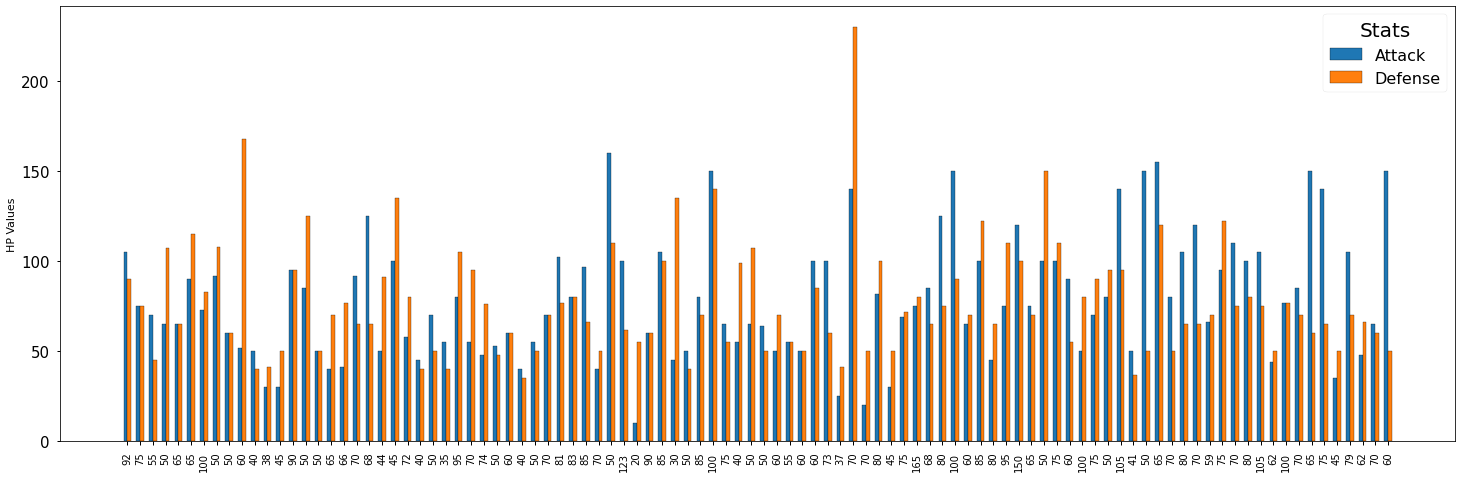

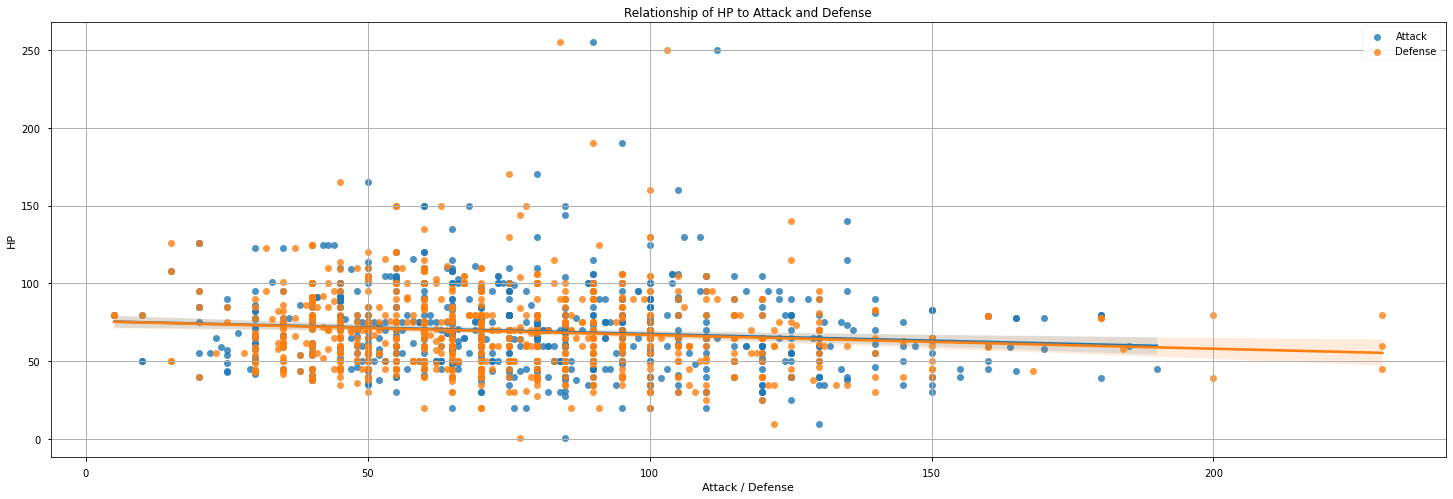

'There appears to be no significant difference between Attack and Defense on HP. Median Attack and Defense have highest HP.'

In [40]:
# RUN THIS CELL TO TEST YOUR FUNCTION
df_pokemon = pd.read_csv('pokemon.csv')
plot_attack_defense(df_pokemon)
plot_attack_defense2(df_pokemon)

3. **Pokémon Trainers Ally Kazam and Cat Erpie are having an argument. Ally believes that `Psychic` type pokémon are superior to `Normal` type pokémon because they have a higher Special Attack, however, Cat disagrees. Complete the function `plot_psychic_vs_bug()` to help Ally Kazam and Cat Erpie compare the distribution of Special Attack for `Psychic` and `Bug` type pokémon.**

**Note**: A pokémon `p` belongs to Type `t` if `p`'s `Type 1 = t` OR `p`'s `Type 2 = t`.
<span style= 'float: right;'><b>[10 marks]</b></span>

In [83]:
def plot_psychic_vs_bug(df_pokemon):
    
    fig, ax = plt.subplots(1,1, figsize = (25,8))
    df_pokemon_copy = df_pokemon.copy()
    
    df_pokemon_copy.loc[df_pokemon_copy['Type 1']=="Psychic", 'psychic_special_attack'] = df_pokemon_copy['Sp. Atk']
    df_pokemon_copy.loc[df_pokemon_copy['Type 1']=="Bug", 'bug_special_attack'] = df_pokemon_copy['Sp. Atk']
    
    psychic_sp_atk = df_pokemon_copy[['psychic_special_attack']].to_numpy()
    psychic_sp_atk = psychic_sp_atk[~np.isnan(psychic_sp_atk)]
    
    bug_sp_atk = df_pokemon_copy[['bug_special_attack']].to_numpy()
    bug_sp_atk = bug_sp_atk[~np.isnan(bug_sp_atk)]
    
    # Plot histogram
    plt.hist(psychic_sp_atk, bins=20, label="psychic")
    plt.hist(bug_sp_atk, bins=20, label="bug")
    plt.xlabel("Special attack")
    plt.ylabel("Frequency")
    leg = ax.legend();
    plt.show()
    print("Psychic types have higher special attack")


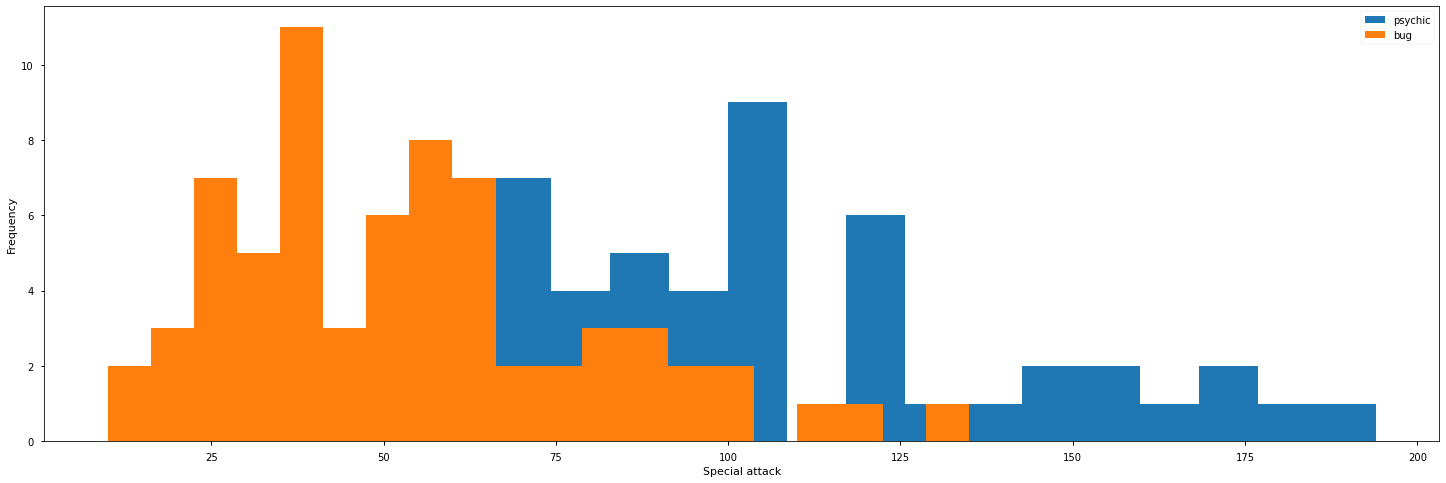

Psychic types have higher special attack


In [84]:
# RUN THIS CELL TO TEST YOUR FUNCTION
df_pokemon = pd.read_csv('pokemon.csv')
plot_psychic_vs_bug(df_pokemon)

## Section C - Introductory Machine Learning

### Question 4: _[15 marks]_

You have been given a file named **admission.csv** which contains a dataset of university admission chance and some factors. The attributes in this dataset includes:

1. GRE Scores ( out of 340 )
2. TOEFL Scores ( out of 120 ) 
3. University Rating ( out of 5 ) 
4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) 
5. Undergraduate GPA ( out of 10 ) 
6. Research Experience ( either 0 or 1 ) 
7. Chance of Admit ( ranging from 0 to 1 )

With our dataset, we would like to predict the chance that a student will be admitted to study in an university with the some of his/her characters and previous performance. 

1) **The first thing to do is to load the data into a Pandas DataFrame and make it ready for use for training our linear regression model.**
<span style= 'float: right;'><b>[3 marks]</b></span>

2) **Then you will have to complete the `linear_regression()` function. This function takes <b>X</b> and <b>Y</b> you constructed from 1) as input, and generates an array $\textbf{$\beta$}$, which contains the parameters of the fitted function. You are also expected to complete the `predict()` function, which returns the predicted value $\hat{y}_{i}$ of a given point $x_{i}$ and the parameters $\textbf{$\beta$}$.**
<span style= 'float: right;'><b>[7 marks]</b></span>

In [157]:
# TODO: COMPLETE THIS FUNCTION
def load_data(data_path):
    df_admission = pd.read_csv(data_path)
    
    X = df_admission.iloc[:, :-1].values # X is feature variables
    Y = df_admission.iloc[:, -1].values  # Y is target variable ('Chance of admit')

    return X, Y

X, Y = load_data('./admission.csv')
print ('The shape of data points X and true value Y are:', X.shape, Y.shape)

def standard_scaler(X):
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    return X

X = standard_scaler(X)

# TODO: COMPLETE THIS FUNCTION
def linear_regression(X,Y):
    """
    Inputs: X,Y are numpy arrays containing the training data points and the true value
    Outputs: beta is numpy array containing the parameters of the fitted function.
    """
    # split the dataset
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=42)
    
    # Instantiate Linear Regression
    mlr = LinearRegression()
    mlr_model = mlr.fit(X_train, Y_train)

    beta = mlr_model.coef_
    alpha = mlr_model.intercept_
    
    return beta, alpha, mlr_model, X_test

# TODO: COMPLETE THIS FUNCTION
def predict(beta,alpha,x, mlr_model, X_test):
    """
    Inputs: x is a numpy array of a point in the dataset (padded 1 at the left).
            beta is a numpy array containing the parameters of the fitted function.
    Outputs: predicted is the value of predicted y_hat of the give data x and parameter set beta.
    """
    # predicted = alpha + beta * x
    y_pred = np.around(mlr_model.predict(X_test), 1)
    
    return y_pred

beta, alpha, mlr_model, X_test = linear_regression(X,Y)
predicted_y = predict(beta, alpha, X, mlr_model, X_test)

print ('Fitted model parameters are:', beta)
print ('The predicted value of', Y_test, 'is:\n\n', predicted_y )

The shape of data points X and true value Y are: (400, 8) (400,)
Fitted model parameters are: [0.02088361 0.02243992 0.0215151  0.01236011 0.00195407 0.01487244
 0.05874394 0.01079466]
The predicted value of [0.68 0.68 0.9  0.79 0.44 0.94 0.43 0.36 0.72 0.85 0.45 0.93 0.64 0.93
 0.71 0.53 0.66 0.34 0.74 0.96 0.64 0.54 0.71 0.54 0.92 0.84 0.59 0.61
 0.7  0.74 0.82 0.94 0.71 0.46 0.69 0.56 0.72 0.58 0.61 0.9  0.73 0.64
 0.74 0.94 0.92 0.82 0.96 0.71 0.94 0.89 0.86 0.73 0.81 0.94 0.39 0.48
 0.71 0.86 0.65 0.86 0.57 0.61 0.79 0.44 0.64 0.74 0.64 0.83 0.89 0.84
 0.75 0.84 0.9  0.88 0.49 0.72 0.64 0.67 0.9  0.79] is:

 [0.7 0.7 0.9 0.8 0.6 0.9 0.5 0.5 0.7 0.8 0.7 0.9 0.5 0.9 0.7 0.7 0.7 0.5
 0.7 1.  0.6 0.6 0.7 0.5 0.9 0.8 0.7 0.6 0.7 0.8 0.8 1.  0.7 0.5 0.7 0.6
 0.7 0.7 0.6 0.9 0.8 0.6 0.8 0.9 0.8 0.9 0.9 0.6 0.9 0.9 0.9 0.8 0.8 0.9
 0.6 0.6 0.7 0.8 0.6 0.8 0.7 0.7 0.7 0.5 0.6 0.7 0.6 0.9 0.9 0.8 0.7 0.8
 0.8 0.8 0.6 0.7 0.7 0.6 0.9 0.8]


3) **If your linear model does not perform very well on your data, it sometime means there's less linear relationship in your data. There are many ways of measuring linear relationship and we will use $R^{2}$ measure, which is defined by:**

<center> $R^{2}$ = $1- \dfrac{\sum{(y_{i}-\hat{y_{i}})^2}}{\sum{(y_{i}-\tilde{y})^2}}$</center>
where, $\tilde{y}$ is the mean of true y values.

**Your task here is to implement the `r_square()` function which calculates $R^{2}$ score for the given X and Y.**

<span style= 'float: right;'><b>[5 marks]</b></span>

In [158]:
# TODO: COMPLETE THIS FUNCTION
def r_square(X,Y):
    """
    Inputs: X,Y are numpy arrays containing the training data points and the true value
    Outputs: r2 is the r square value of the input X and Y
    """
    #  
    R2 = r2_score(Y_test, predicted_y)
    return R2


r2 = r_square(X,Y)
print ('The R2 value of this dataset is:', r2 )

The R2 value of this dataset is: 0.7764136758446053


In [151]:
df_admission = pd.read_csv('./admission.csv')

X = df_admission.iloc[:, :-1].values # X is feature variables
y = df_admission.iloc[:, -1].values  # Y is target variable ('Chance of admit')

scaler = StandardScaler()
X = scaler.fit_transform(X)

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Instantiate Linear Regression
mlr = LinearRegression()
mlr_model = mlr.fit(X_train, y_train)

# Predict
y_pred = np.around(mlr_model.predict(X_test), 1)
print("Actual values:", y_test[0:5])
print(f'MLR model predictions {y_pred[0:5]}')

beta = mlr_model.coef_
alpha = mlr_model.intercept_
print ('Fitted model parameters are:', beta)

print("R squared score:",r2_score(y_test, y_pred))

Actual values: [0.68 0.68 0.9  0.79 0.44]
MLR model predictions [0.7 0.7 0.9 0.8 0.6]
Fitted model parameters are: [0.02088361 0.02243992 0.0215151  0.01236011 0.00195407 0.01487244
 0.05874394 0.01079466]
R squared score: 0.7764136758446053
